# Exercises for Lecture 6 (Training II)

In [1]:
import datetime
now = datetime.datetime.now()
print("Last executed: " + now.strftime("%Y-%m-%d %H:%M:%S"))

Last executed: 2021-01-26 18:02:34


In [2]:
# Common imports
import os
import numpy as np
np.random.seed(42) # To make this notebook's output stable across runs

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

## Set up training data 

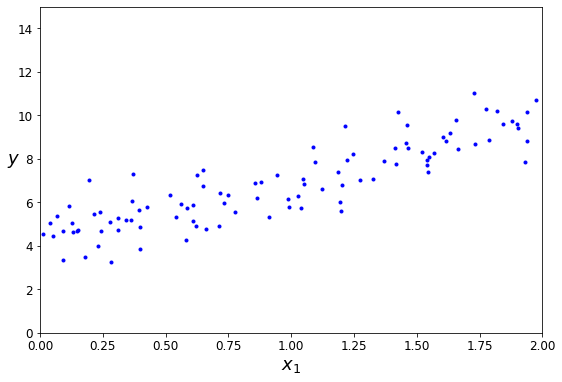

In [3]:
m = 100
X = 2 * np.random.rand(m, 1)
y = 4 + 3 * X + np.random.randn(m, 1)
plt.figure(figsize=(9,6))
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15]);

In [5]:
X_b = np.c_[np.ones((m, 1)), X]         # add x0 = 1 to each instance
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]

## Exercise 1: Solve using Scikit-Learn (without learning schedule)

Solve the above problem using Scikit-Learn, considering a learning rate of 0.1.  Display the intercept and slope of the fitted line.

Text(0.5, 1.0, '$\\alpha = 0.1$')

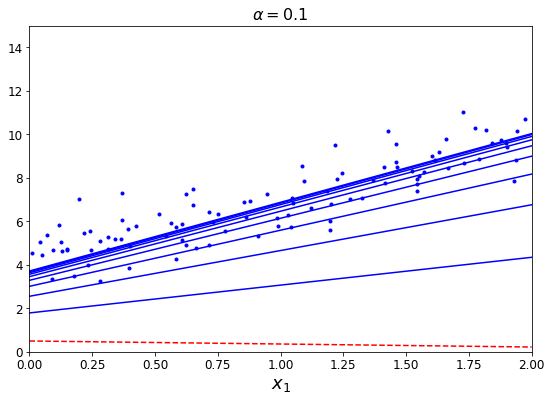

In [22]:
X_b = np.c_[np.ones((m, 1)), X]         # add x0 = 1 to each instance
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance

theta_path_bgd = []
m = len(X_b)
np.random.seed(42)
alpha=0.1
n_iterations = 1000

theta = np.random.randn(2,1)  # random initialization
plt.figure(figsize=(9,6))
plt.plot(X, y, "b.")

for iteration in range(n_iterations):
    if iteration < 10:
        y_predict = X_new_b.dot(theta)
        style = "b-" if iteration > 0 else "r--"
        plt.plot(X_new, y_predict, style)
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - alpha * gradients
    theta_path_bgd.append(theta)
plt.xlabel("$x_1$", fontsize=18)
plt.axis([0, 2, 0, 15])
plt.title(r"$\alpha = {}$".format(alpha), fontsize=16)


In [23]:
theta

array([[4.21509616],
       [2.77011339]])

## Exercise 2: implement a mini-batch gradient descent algorithm to solve previous problem.

Hints: 
  - May want to start with stochastic GD implementation and adapt it. 
  - The numpy function [`np.random.permutation`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.permutation.html) may be useful.

In [12]:
theta_path_mgd = []
n_iterations = 50
minibatch_size = 20
m = len(X_b)

np.random.seed(42)
theta = np.random.randn(2,1)  # initialize theta

t0,t1 = 5,50
def learning_schedule(t):
    return t0/(t+t1)

t = 0

for epoch in range(n_iterations):
    # shuffle data using np.random.permutation(m)
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    
    # loop over minibatches
    for i in range(0,m,minibatch_size):
        # compute learning rate
        t = t+1
        # pull out mini-batch
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        # compute gradient
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        alpha = learning_schedule(t)
        # update theta by gradient step
        theta = theta - alpha * gradients
        theta_path_mgd.append(theta)
        
theta

array([[4.18223159],
       [2.79659366]])

In [13]:
theta_path_mgd

[array([[1.8489161 ],
        [1.45847878]]),
 array([[2.5271734 ],
        [2.10524039]]),
 array([[2.91239024],
        [2.58564926]]),
 array([[3.19106183],
        [2.79759403]]),
 array([[3.37484852],
        [2.96886955]]),
 array([[3.52872871],
        [3.08647679]]),
 array([[3.58070229],
        [3.13611284]]),
 array([[3.65698184],
        [3.19515887]]),
 array([[3.65195164],
        [3.14047062]]),
 array([[3.67198479],
        [3.13985341]]),
 array([[3.72882162],
        [3.15453269]]),
 array([[3.69745041],
        [3.11610982]]),
 array([[3.74177652],
        [3.11486887]]),
 array([[3.74694037],
        [3.11297129]]),
 array([[3.7990001 ],
        [3.15593943]]),
 array([[3.79967938],
        [3.13132728]]),
 array([[3.85085858],
        [3.17346784]]),
 array([[3.85732181],
        [3.16683977]]),
 array([[3.84787945],
        [3.13843322]]),
 array([[3.816894  ],
        [3.07169569]]),
 array([[3.84270146],
        [3.04399335]]),
 array([[3.85204321],
        [3.0